# Analysis Question 1: To what extent does a high ESG rating correlate with financial performance?

## Hypothesis Testing
Null Hypothesis: High ESG Score will not correlate with financial preformance.

Alternative Hypothesis: High ESG Score will correlate with financial preformance.

In [237]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import r2_score


# read in the csv
data = pd.read_csv('Model_CSV.csv')
display(data)

,Ticker,Company,P/E Ratio,Forward P/E,Revenue (TTM),Gross Profits,Net Income,EBITDA,Market Cap,Sector,ESG score,ESG risk
0,MMM,3M Company,17.295145,17.579748,2.451300e+10,1.010200e+10,4.420000e+09,5.189000e+09,7.474258e+10,Industrials,43.0,Severe
1,AOS,A.O. Smith Corporation,17.988981,16.044226,3.818100e+09,1.456100e+09,5.336000e+08,7.775000e+08,9.372444e+09,Industrials,26.8,Medium
2,ABT,Abbott Laboratories,16.912418,25.073645,4.234400e+10,2.367800e+10,1.345100e+10,1.100250e+10,2.243860e+11,Healthcare,20.4,Medium
3,ABBV,AbbVie Inc.,75.154160,14.869744,5.633400e+10,3.964500e+10,4.238000e+09,2.671800e+10,3.190710e+11,Healthcare,24.3,Medium
4,ACN,Accenture plc,24.043730,20.711443,6.722149e+10,2.163372e+10,7.683453e+09,1.147250e+10,1.824300e+11,Technology,11.1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
438,XYL,Xylem Inc.,31.673971,24.338947,8.562000e+09,3.212000e+09,8.900000e+08,1.683000e+09,2.813358e+10,Industrials,22.9,Medium
439,YUM,"Yum! Brands, Inc.",28.272032,24.273027,7.549000e+09,3.584000e+09,1.486000e+09,2.714000e+09,4.110354e+10,Consumer Cyclical,20.5,Medium
440,ZBRA,Zebra Technologies Corporation,23.976423,15.216957,4.981000e+09,2.413000e+09,5.280000e+08,9.370000e+08,1.248306e+10,Technology,9.9,Negligible
441,ZBH,"Zimmer Biomet Holdings, Inc.",22.911964,11.802325,7.678600e+09,5.498900e+09,9.038000e+08,2.590300e+09,2.008086e+10,Healthcare,26.2,Medium


In [239]:
# showing the data types we are working with 
data.dtypes

Ticker            object
Company           object
P/E Ratio        float64
Forward P/E      float64
Revenue (TTM)    float64
Gross Profits    float64
Net Income       float64
EBITDA           float64
Market Cap       float64
Sector            object
ESG score        float64
ESG risk          object
dtype: object

In [375]:
data['ESG risk'].unique()

array(['Severe', 'Medium', 'Low', 'High', 'Negligible'], dtype=object)

In [241]:
# making risk numeric -- end up not needing this later 
risk_numeric = {
    "Low": 1,
    "Medium": 2,
    "High": 3,
    "Negligible":4,
    "Severe":5}

data["ESG Risk Numeric"] = data["ESG risk"].map(risk_numeric)
display(data)

,Ticker,Company,P/E Ratio,Forward P/E,Revenue (TTM),Gross Profits,Net Income,EBITDA,Market Cap,Sector,ESG score,ESG risk,ESG Risk Numeric
0,MMM,3M Company,17.295145,17.579748,2.451300e+10,1.010200e+10,4.420000e+09,5.189000e+09,7.474258e+10,Industrials,43.0,Severe,5
1,AOS,A.O. Smith Corporation,17.988981,16.044226,3.818100e+09,1.456100e+09,5.336000e+08,7.775000e+08,9.372444e+09,Industrials,26.8,Medium,2
2,ABT,Abbott Laboratories,16.912418,25.073645,4.234400e+10,2.367800e+10,1.345100e+10,1.100250e+10,2.243860e+11,Healthcare,20.4,Medium,2
3,ABBV,AbbVie Inc.,75.154160,14.869744,5.633400e+10,3.964500e+10,4.238000e+09,2.671800e+10,3.190710e+11,Healthcare,24.3,Medium,2
4,ACN,Accenture plc,24.043730,20.711443,6.722149e+10,2.163372e+10,7.683453e+09,1.147250e+10,1.824300e+11,Technology,11.1,Low,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,XYL,Xylem Inc.,31.673971,24.338947,8.562000e+09,3.212000e+09,8.900000e+08,1.683000e+09,2.813358e+10,Industrials,22.9,Medium,2
439,YUM,"Yum! Brands, Inc.",28.272032,24.273027,7.549000e+09,3.584000e+09,1.486000e+09,2.714000e+09,4.110354e+10,Consumer Cyclical,20.5,Medium,2
440,ZBRA,Zebra Technologies Corporation,23.976423,15.216957,4.981000e+09,2.413000e+09,5.280000e+08,9.370000e+08,1.248306e+10,Technology,9.9,Negligible,4
441,ZBH,"Zimmer Biomet Holdings, Inc.",22.911964,11.802325,7.678600e+09,5.498900e+09,9.038000e+08,2.590300e+09,2.008086e+10,Healthcare,26.2,Medium,2


## Univariate 

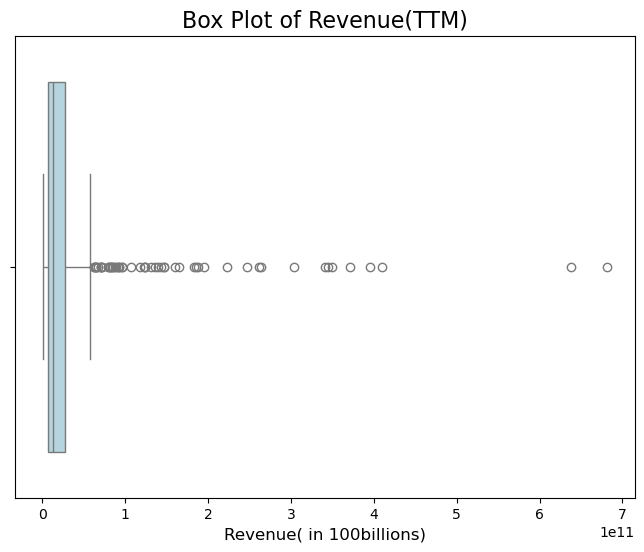

Number of outliers: 55


In [244]:
# Box plot to look at the distribution of Revenue  
plt.figure(figsize=(8, 6))
sns.boxplot(x=data["Revenue (TTM)"], color="lightblue")
plt.title("Box Plot of Revenue(TTM)", fontsize=16)
plt.xlabel("Revenue( in 100billions)", fontsize=12)
plt.show()

# defining a function to determine outliers 
def count_outliers(series):
    
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers)

# Example usage:
outlier_count = count_outliers(data["Revenue (TTM)"])
print("Number of outliers:", outlier_count)

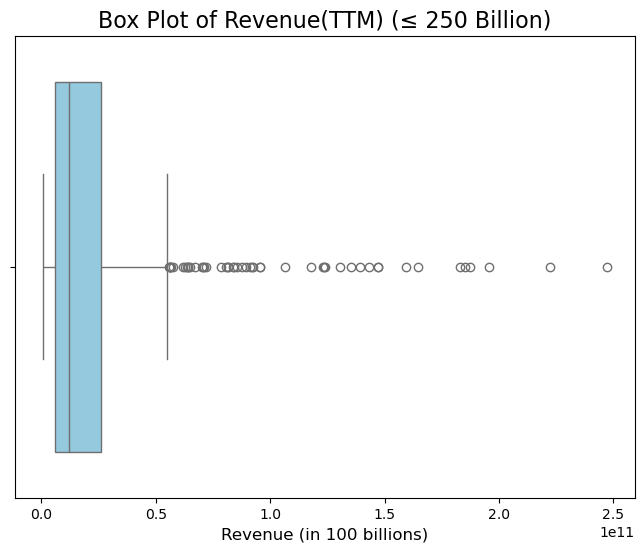

In [246]:
# Another boxplot on Revenue, but this time filtering the data. 
# Only including companies with Revenue (TTM) less than or equal to 250 billion
filtered_data = data[data["Revenue (TTM)"] <= 250_000_000_000]

plt.figure(figsize=(8, 6))
sns.boxplot(x=filtered_data["Revenue (TTM)"], color="skyblue")
plt.title("Box Plot of Revenue(TTM) (≤ 250 Billion)", fontsize=16)
plt.xlabel("Revenue (in 100 billions)", fontsize=12)
plt.show()

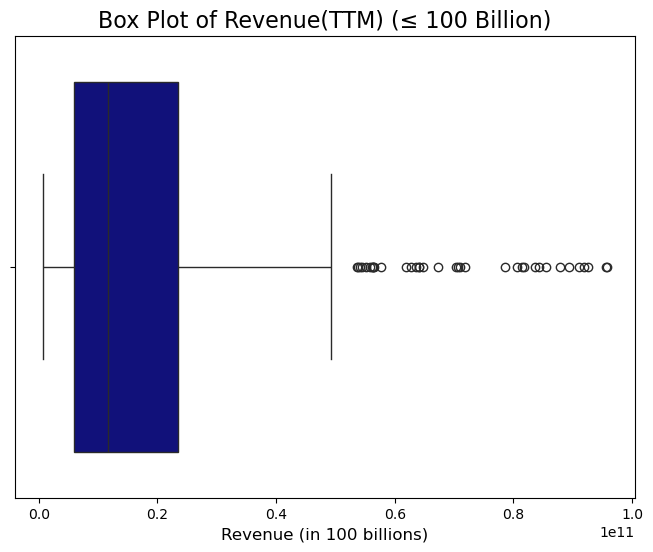

In [248]:
# Last boxplot on Revenue, again filtering the data for Revenue less than or equal to 100 billion
# We are trying to see if by lowering the amount of data we had would take out the outliers
filtered_data = data[data["Revenue (TTM)"] <= 100_000_000_000]

plt.figure(figsize=(8, 6))
sns.boxplot(x=filtered_data["Revenue (TTM)"], color="darkblue")
plt.title("Box Plot of Revenue(TTM) (≤ 100 Billion)", fontsize=16)
plt.xlabel("Revenue (in 100 billions)", fontsize=12)
plt.show()

#### the boxplot is heavily skewed to the right or positively skewed. Showing that most companies are small compared to a few mega-companies that absolutely dominate in revenue. 

In [251]:
# using descriptive stats to take a closer look at the numbers in the box plot  
descriptive_statistics = data["Revenue (TTM)"].describe()
descriptive_statistics

count    4.430000e+02
mean     3.420352e+10
std      7.062331e+10
min      7.058230e+08
25%      6.140454e+09
50%      1.267300e+10
75%      2.773650e+10
max      6.809850e+11
Name: Revenue (TTM), dtype: float64

#### We made box plots of EBITDA, Net Income, and Gross Profits to look at their distribution. They all looked very similar to the box plot for revenue. Proving again that mega-companies are skewing the data

In [254]:
# looking at the counts/frequency of the levels of risk 
risk = data['ESG risk'].value_counts()
print("Frequency Counts:")
print(risk)

Frequency Counts:
ESG risk
Low           215
Medium        168
High           45
Negligible     13
Severe          2
Name: count, dtype: int64


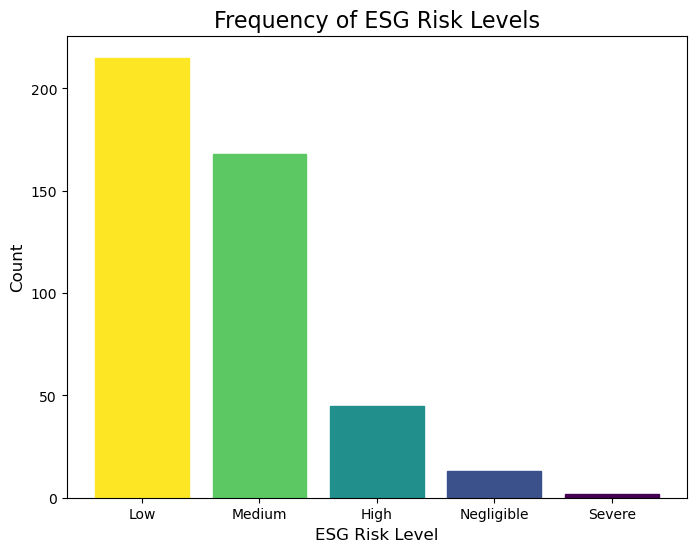

In [256]:
# create a bar chart with the risk frequency counts 
plt.figure(figsize=(8, 6))
bars = plt.bar(risk.index, risk.values, edgecolor='black')

# applying different colors 
colors = plt.cm.viridis_r(np.linspace(0, 1, len(bars))) 
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.title("Frequency of ESG Risk Levels", fontsize=16)
plt.xlabel("ESG Risk Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

In [258]:
# looking at the counts/frequency of each industry 
sector = data['Sector'].value_counts()
print("Frequency Counts:")
print(sector)

Frequency Counts:
Sector
Technology                79
Industrials               70
Healthcare                55
Consumer Cyclical         52
Financial Services        36
Consumer Defensive        32
Utilities                 30
Real Estate               30
Energy                    22
Basic Materials           19
Communication Services    18
Name: count, dtype: int64


## Bivariate Statistics 

In [261]:
# We chose spearman correlation because this data is not normally distributed based on the box plots
# spearman correlation between net income and ESG Score
spearman_corr = data["Net Income"].corr(data["ESG score"], method="spearman")

# display the result
print(f"Spearman Correlation: {spearman_corr:.4f}")

# interpretation
if abs(spearman_corr) < 0.3:
    print("Interpretation: No or weak monotonic correlation.")
elif 0.3 <= abs(spearman_corr) < 0.7:
    print("Interpretation: Moderate monotonic correlation.")
else:
    print("Interpretation: Strong monotonic correlation.")

Spearman Correlation: 0.1198
Interpretation: No or weak monotonic correlation.


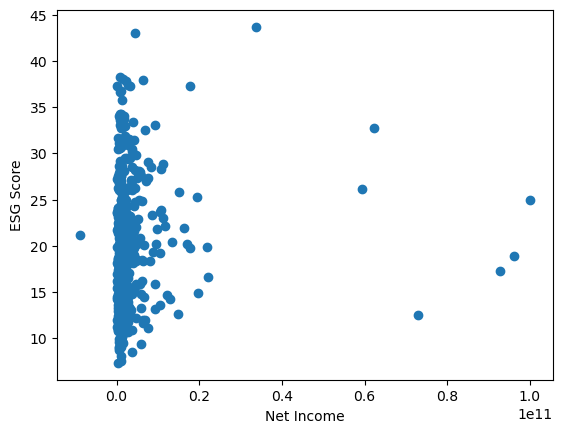

In [263]:
# scatterplot of spearman correlation between net income and ESG score 
plt.scatter(data['Net Income'], data['ESG score'])
plt.xlabel("Net Income")
plt.ylabel("ESG Score")
plt.show()

In [265]:
# spearman correlation between Revenue and ESG Score
spearman_corr = data["Revenue (TTM)"].corr(data["ESG score"], method="spearman")

# display the result
print(f"Spearman Correlation: {spearman_corr:.4f}")

# interpretation
if abs(spearman_corr) < 0.3:
    print("Interpretation: No or weak monotonic correlation.")
elif 0.3 <= abs(spearman_corr) < 0.7:
    print("Interpretation: Moderate monotonic correlation.")
else:
    print("Interpretation: Strong monotonic correlation.")

Spearman Correlation: 0.1811
Interpretation: No or weak monotonic correlation.


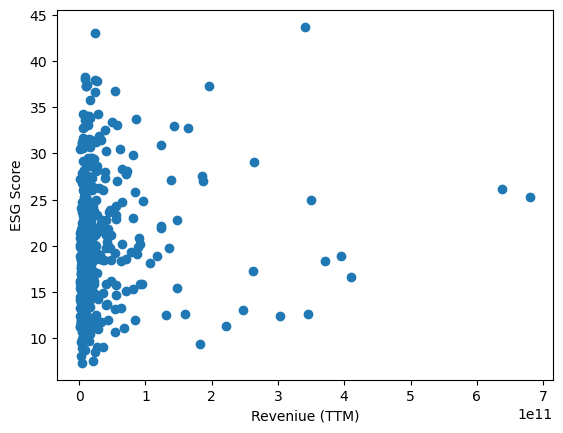

In [267]:
# scatterplot of spearman correlation between Revenue and ESG score 
plt.scatter(data['Revenue (TTM)'], data['ESG score'])
plt.xlabel("Reveniue (TTM)")
plt.ylabel("ESG Score")
plt.show()

In [269]:
# spearman correlation between Market Cap and ESG Risk
spearman_corr = data["Market Cap"].corr(data["ESG Risk Numeric"], method="spearman")

# display the result
print(f"Spearman Correlation: {spearman_corr:}")

# interpretation
if abs(spearman_corr) < 0.3:
    print("Interpretation: No or weak monotonic correlation.")
elif 0.3 <= abs(spearman_corr) < 0.7:
    print("Interpretation: Moderate monotonic correlation.")
else:
    print("Interpretation: Strong monotonic correlation.")

Spearman Correlation: -0.07501485239149092
Interpretation: No or weak monotonic correlation.


In [271]:
# spearman correlation between P/E Ratio and ESG score
spearman_corr = data["P/E Ratio"].corr(data["ESG score"], method="spearman")

# display the result
print(f"Spearman Correlation: {spearman_corr:}")

# interpretation
if abs(spearman_corr) < 0.3:
    print("Interpretation: No or weak monotonic correlation.")
elif 0.3 <= abs(spearman_corr) < 0.7:
    print("Interpretation: Moderate monotonic correlation.")
else:
    print("Interpretation: Strong monotonic correlation.")

Spearman Correlation: -0.19897322899967906
Interpretation: No or weak monotonic correlation.


### Not a single one of these is correlating, or there is not enought data to make a statistically significant 

## Machine Learning

### Forward P/E was taken out of all models due to potential data leakage 

In [324]:
# We are going to do an importance chart but first we need to do a random forest classifier 

X = data[['P/E Ratio', 'Revenue (TTM)', 'Gross Profits', 'Net Income', 'EBITDA', 'Market Cap']]
y = data['ESG Risk Numeric']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# checking accuracy 
print('Random Forest Accuracy:', rf_model.score(X_test, y_test))

Random Forest Accuracy: 0.5056179775280899


### We are interested to see if splitting by sector will raise the accuracy level of the random forest

/var/folders/w8/48w65ct56095y75y6ch9wfjw0000gn/T/ipykernel_27272/3014944849.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


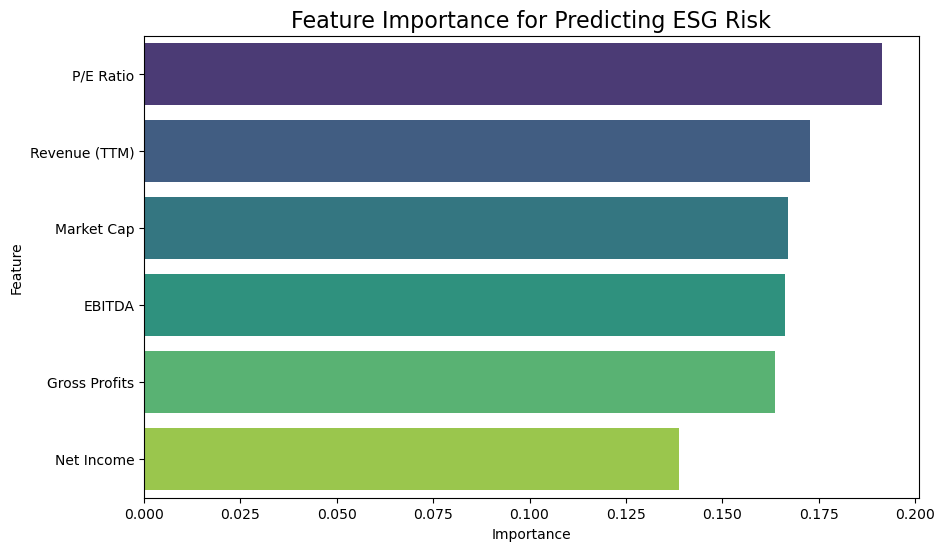

In [327]:
# now get the feature importances from the random forest model 
importances = rf_model.feature_importances_
feature_names = X.columns

# create a dataframe with the importances 
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# make a plot with that data 
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for Predicting ESG Risk', fontsize=16)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [329]:
# creating dummy variables for each sector 
sector_dummies = pd.get_dummies(data['Sector'], prefix='Sector')

# redefining X and Y
    # concatenate sector dummies to your original X
X = pd.concat([data[['P/E Ratio', 'Revenue (TTM)', 'Gross Profits', 
                     'Net Income', 'EBITDA', 'Market Cap']], sector_dummies], axis=1)

    # target stays the same
y = data['ESG Risk Numeric']

# fill any missing values with the median 
X = X.fillna(X.median())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)

# printing the accuracy
print('Accuracy after adding Sector:', rf_model.score(X_test, y_test))

Accuracy after adding Sector: 0.5168539325842697


### the accuracy was raised a little bit but not anything monumental 

/var/folders/w8/48w65ct56095y75y6ch9wfjw0000gn/T/ipykernel_27272/3440476464.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


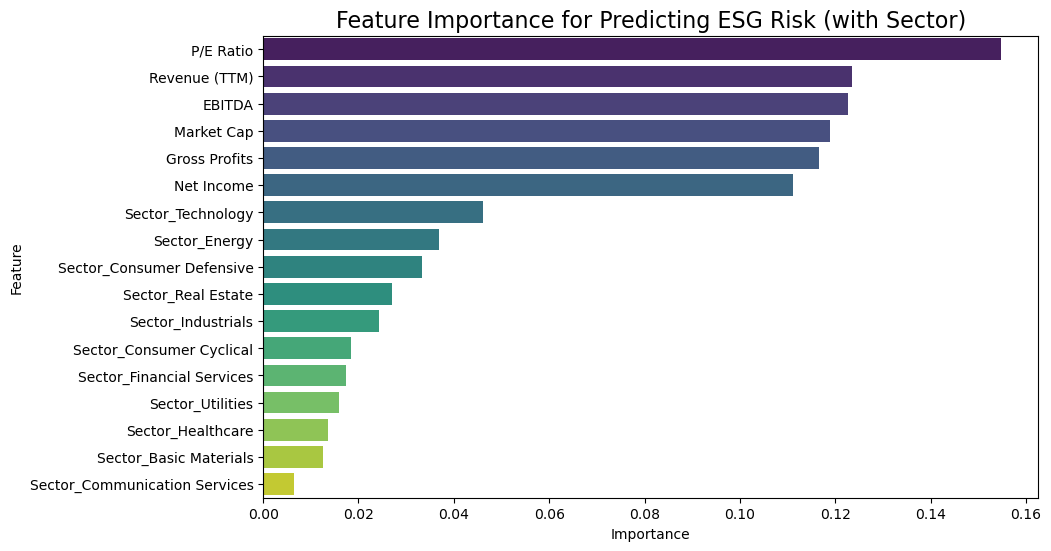

In [332]:
# looking at the feature importances after splitting by sector 
# now get the feature importances from the 2nd random forest model 
importances = rf_model.feature_importances_
feature_names = X.columns

# create a dataframe with the new importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# plot a bar graph with that data 
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for Predicting ESG Risk (with Sector)', fontsize=16)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### We think the imbalance of high and severe esg risk might be lessening the models accuracy. To address the imablance we are going to weight the classes correctly 

In [335]:
# train a random forest that balances all the risks since there is only 2 companies with severe
rf_model = RandomForestClassifier(n_estimators=500, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# accuracy
print('Accuracy after class balancing:', rf_model.score(X_test, y_test))

Accuracy after class balancing: 0.550561797752809


### The balanced random forest did not have better accuracy 

In [338]:
# starting the process to take out outliers that are skewing the data 
# sorting the df by highest revenue at the top 
data_sorted = data.sort_values(by='Revenue (TTM)', ascending=False)
data_sorted

,Ticker,Company,P/E Ratio,Forward P/E,Revenue (TTM),Gross Profits,Net Income,EBITDA,Market Cap,Sector,ESG score,ESG risk,ESG Risk Numeric,ESG_label
424,WMT,Walmart Inc.,39.767630,35.235290,6.809850e+11,1.692320e+11,1.943600e+10,4.222200e+10,7.683350e+11,Consumer Defensive,25.3,Medium,2,0
19,AMZN,"Amazon.com, Inc.",33.793476,30.331705,6.379590e+11,3.116710e+11,5.924800e+10,1.204680e+11,1.979640e+12,Consumer Cyclical,26.1,Medium,2,0
409,UNH,UnitedHealth Group Incorporated,17.758476,14.188963,4.100570e+11,9.016800e+10,2.210600e+10,3.623800e+10,3.861630e+11,Healthcare,16.6,Low,1,0
33,AAPL,Apple Inc.,33.127186,25.074608,3.957600e+11,1.841030e+11,9.615000e+10,1.373520e+11,3.130160e+12,Technology,18.9,Low,1,0
110,CVS,CVS Health Corporation,18.010927,10.172839,3.706560e+11,4.924800e+10,4.614000e+09,1.261600e+10,8.321609e+10,Healthcare,18.3,Low,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,ENPH,"Enphase Energy, Inc.",41.972477,12.500000,1.423128e+09,5.243710e+08,1.484850e+08,2.259830e+08,6.002720e+09,Technology,19.9,Low,1,0
164,FRT,Federal Realty Investment Trust,27.926900,31.110750,1.205612e+09,8.213490e+08,2.858930e+08,7.507550e+08,8.250956e+09,Real Estate,12.4,Low,1,0
52,TECH,Bio-Techne Corp,51.816326,23.187214,1.196016e+09,7.920030e+08,1.581040e+08,3.095340e+08,8.027708e+09,Healthcare,27.2,Medium,2,0
262,MKTX,"MarketAxess Holdings, Inc.",29.930042,26.511545,8.170970e+08,5.094410e+08,2.741810e+08,4.146940e+08,8.116974e+09,Financial Services,16.0,Low,1,0


In [340]:
# making a function to count outliers 
def count_outliers2(series):
    
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers)


# taking out 77 of the top companies in terms of revenue to see if extreme high performers where skewing the esg data analysis 
outliers_trimmed = data_sorted.iloc[77:]

In [342]:
# counting how many other outliers there are after taking out 77 because we were curious
outlier_count2 = count_outliers2(outliers_trimmed['Revenue (TTM)'])
outlier_count2

15

In [344]:
outliers_trimmed

,Ticker,Company,P/E Ratio,Forward P/E,Revenue (TTM),Gross Profits,Net Income,EBITDA,Market Cap,Sector,ESG score,ESG risk,ESG Risk Numeric,ESG_label
51,BBY,"Best Buy Co., Inc.",15.420560,9.649122,4.152800e+10,9.385000e+09,9.270000e+08,2.600000e+09,1.395042e+10,Consumer Cyclical,13.7,Low,1,0
344,QCOM,QUALCOMM Incorporated,15.880259,12.036796,4.069600e+10,2.278700e+10,1.047900e+10,1.258500e+10,1.628140e+11,Technology,13.6,Low,1,0
123,DG,Dollar General Corporation,18.358120,15.081994,4.061231e+10,1.201750e+10,1.125253e+09,2.912477e+09,2.063323e+10,Consumer Defensive,21.2,Medium,2,0
283,MOH,Molina Healthcare Inc,15.152584,12.205757,4.038000e+10,4.887000e+09,1.176000e+09,1.835000e+09,1.694574e+10,Healthcare,22.8,Medium,2,0
302,NOC,Northrop Grumman Corporation,18.281485,16.502851,4.036800e+10,7.809000e+09,3.711000e+09,6.341000e+09,6.664874e+10,Industrials,30.3,High,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,ENPH,"Enphase Energy, Inc.",41.972477,12.500000,1.423128e+09,5.243710e+08,1.484850e+08,2.259830e+08,6.002720e+09,Technology,19.9,Low,1,0
164,FRT,Federal Realty Investment Trust,27.926900,31.110750,1.205612e+09,8.213490e+08,2.858930e+08,7.507550e+08,8.250956e+09,Real Estate,12.4,Low,1,0
52,TECH,Bio-Techne Corp,51.816326,23.187214,1.196016e+09,7.920030e+08,1.581040e+08,3.095340e+08,8.027708e+09,Healthcare,27.2,Medium,2,0
262,MKTX,"MarketAxess Holdings, Inc.",29.930042,26.511545,8.170970e+08,5.094410e+08,2.741810e+08,4.146940e+08,8.116974e+09,Financial Services,16.0,Low,1,0


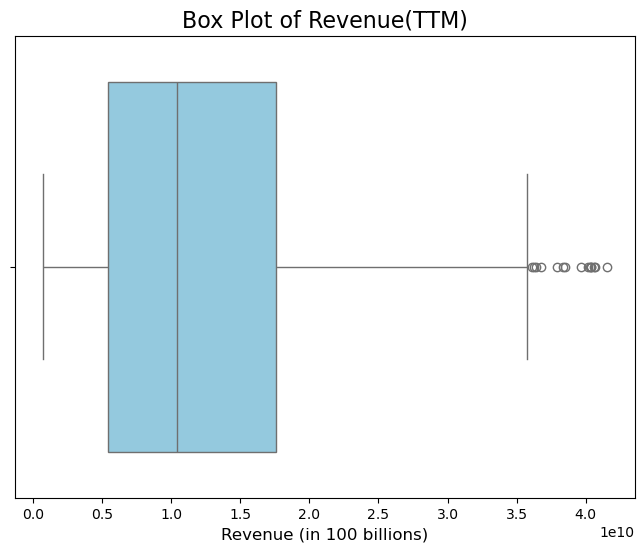

In [346]:
# Making a box plot to look at the distribution of Revenue after taking out the outliers 
plt.figure(figsize=(8, 6))
sns.boxplot(x=outliers_trimmed["Revenue (TTM)"], color="skyblue")
plt.title("Box Plot of Revenue(TTM)", fontsize=16)
plt.xlabel("Revenue (in 100 billions)", fontsize=12)
plt.show()

In [348]:
# Making another Random Forest with out the outliers to see how it effects the accuracy of the model
# also keeping the classes balanced 
X = outliers_trimmed[['P/E Ratio', 'Revenue (TTM)', 'Gross Profits', 'Net Income', 'EBITDA', 'Market Cap']]
y = outliers_trimmed['ESG Risk Numeric'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model2 = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model2.fit(X_train, y_train)

# printing the accuracy
print('Accuracy:', rf_model2.score(X_test, y_test))

Accuracy: 0.5540540540540541


/var/folders/w8/48w65ct56095y75y6ch9wfjw0000gn/T/ipykernel_27272/3715741589.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df2, palette='viridis')


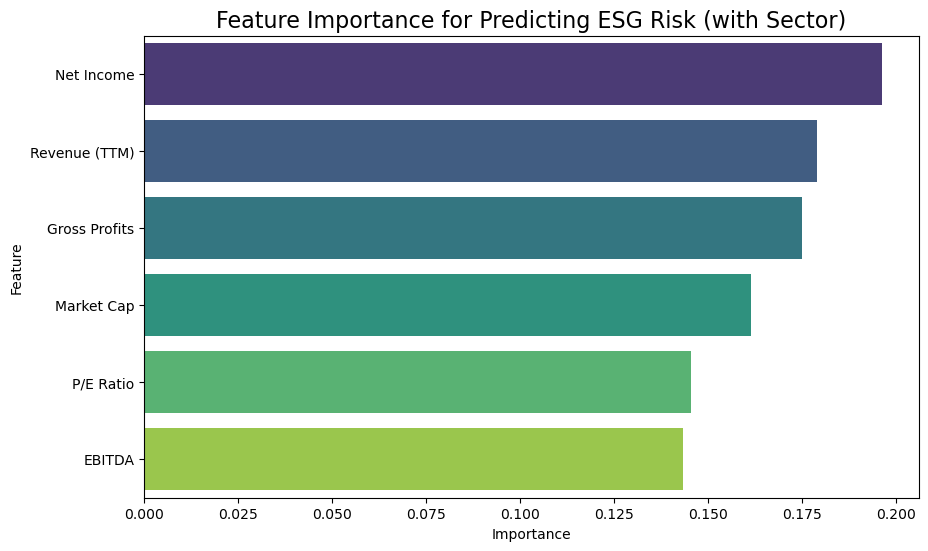

In [350]:
# Making a plot to see if the feature importances have changed without the outliers 
importances2 = rf_model2.feature_importances_
feature_names2 = X.columns

# creating a dataframe 
feature_importance_df2 = pd.DataFrame({'Feature': feature_names2, 'Importance': importances2})
feature_importance_df2 = feature_importance_df2.sort_values(by='Importance', ascending=False)

# plotting the new feature importances 
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df2, palette='viridis')
plt.title('Feature Importance for Predicting ESG Risk (with Sector)', fontsize=16)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show() 

### Again not much has changed, even with minimal outliers 

## Now are we trying a linear regression since our findings on random forest were about as good as random guessing 

In [354]:
X = data[["Revenue (TTM)"]]
y = data["ESG score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# evaluate the model 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print results
print(f"Train R^2: {r2_train:.4f}")
print(f"Test R^2: {r2_test:.4f}")
print(f"Slope: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

Train R^2: 0.0091
Test R^2: -0.0117
Slope: 1.1697038830582984e-11
Intercept: 20.082744726584156


### These are awful r^2 from the linear regression, so we are going to try logistic regression with one hot encoding 

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        77
           1       1.00      0.08      0.15        12

    accuracy                           0.88        89
   macro avg       0.94      0.54      0.54        89
weighted avg       0.89      0.88      0.83        89

AUC-ROC: 0.6493506493506493


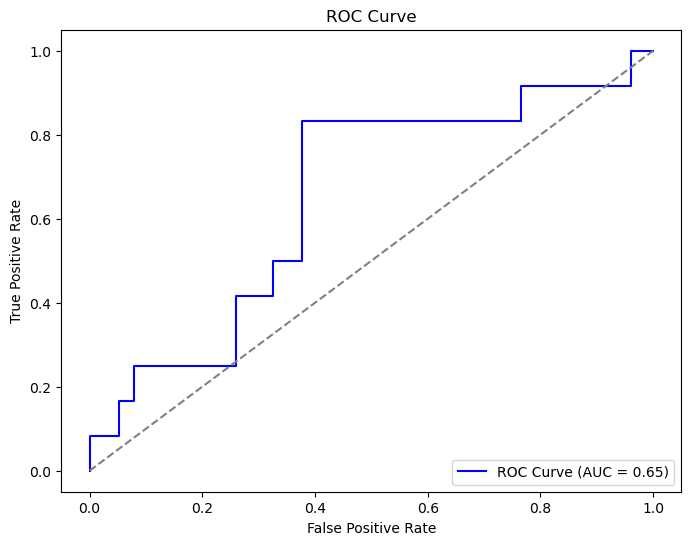

In [357]:
# Binning the ESG risk levels into binary labels: 0 = Low risk, 1 = High risk
data["ESG_label"] = data["ESG risk"].map({
    "Negligible": 0,
    "Low": 0,
    "Medium": 0,
    "High": 1,
    "Severe": 1
})

# define features and target 
features = ["Revenue (TTM)", "Market Cap", "P/E Ratio", "Gross Profits", "EBITDA", "Sector"]
target = "ESG_label"

X = data[features]
y = data[target]

# using preprocessing pipeline to standardize numeric columns and one-hot encode the sector column 
numeric_features = ["Revenue (TTM)", "Market Cap", "P/E Ratio", "Gross Profits", "EBITDA"]
categorical_features = ["Sector"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# pipeline
pipeline = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))
pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

y_pred_prob = pipeline.predict_proba(X_test)[:, 1]


# calculating the AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC: {roc_auc}")

# plot the AUC-ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### The accuracy is our highest yet and the AUC is better than random guessing! Still not great though so going to try a decision tree next 


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        77
           1       0.20      0.17      0.18        12

    accuracy                           0.80        89
   macro avg       0.54      0.53      0.53        89
weighted avg       0.78      0.80      0.79        89

Decision Tree AUC-ROC: 0.53


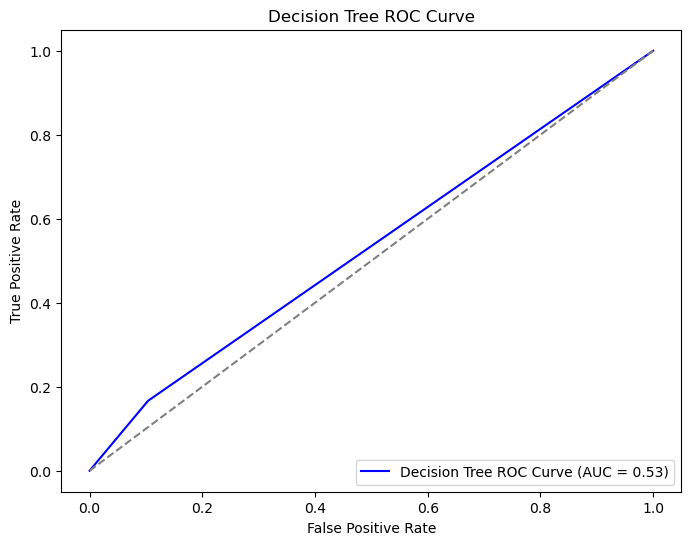

In [360]:
from sklearn.tree import DecisionTreeClassifier

# Using the same features/targets, X and Y's to make this decision tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
pipeline = make_pipeline(preprocessor, decision_tree_model)
pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred))

y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

# calculating the AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Decision Tree AUC-ROC: {roc_auc:.2f}")

# plotting the AUC-ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Decision Tree ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc='lower right')
plt.show()

## That decision tree is not better than random guessing. The AUC and accuracy are lower than the logistic regression 


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        65
           1       0.29      0.22      0.25         9

    accuracy                           0.84        74
   macro avg       0.59      0.57      0.58        74
weighted avg       0.82      0.84      0.83        74

Decision Tree AUC-ROC: 0.57


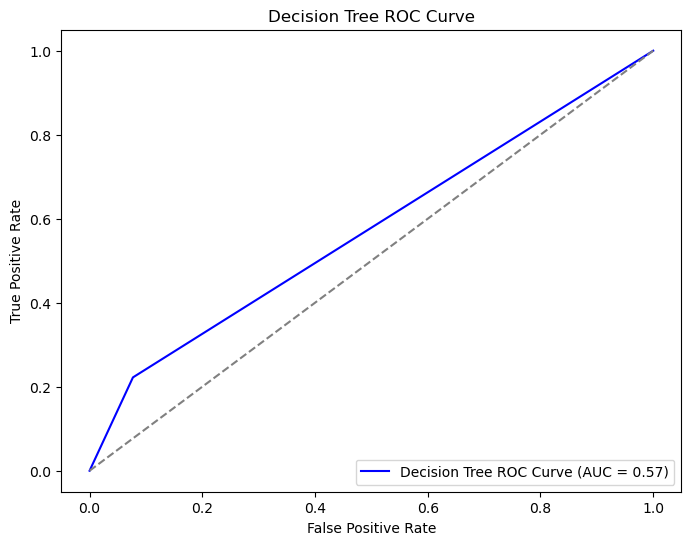

In [363]:
# Now trying logistic regression with no outlier data 
# redefine features and target
features = ["Revenue (TTM)", "Market Cap", "P/E Ratio", "Gross Profits", "EBITDA", "Sector"]
target = "ESG_label"

X = outliers_trimmed[features]
y = outliers_trimmed[target]

# Preprocessing pipeline: standardize numeric, one-hot encode sector
numeric_features = ["Revenue (TTM)", "Market Cap", "P/E Ratio", "Gross Profits", "EBITDA"]
categorical_features = ["Sector"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Model
decision_tree_model = DecisionTreeClassifier(random_state=42)
pipeline = make_pipeline(preprocessor, decision_tree_model)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred))

y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

# calculating AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Decision Tree AUC-ROC: {roc_auc:.2f}")

# plotting the AUC-ROC curve 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Decision Tree ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc='lower right')
plt.show()


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92        77
           1       0.33      0.08      0.13        12

    accuracy                           0.85        89
   macro avg       0.60      0.53      0.53        89
weighted avg       0.80      0.85      0.81        89

SVM AUC-ROC: 0.70


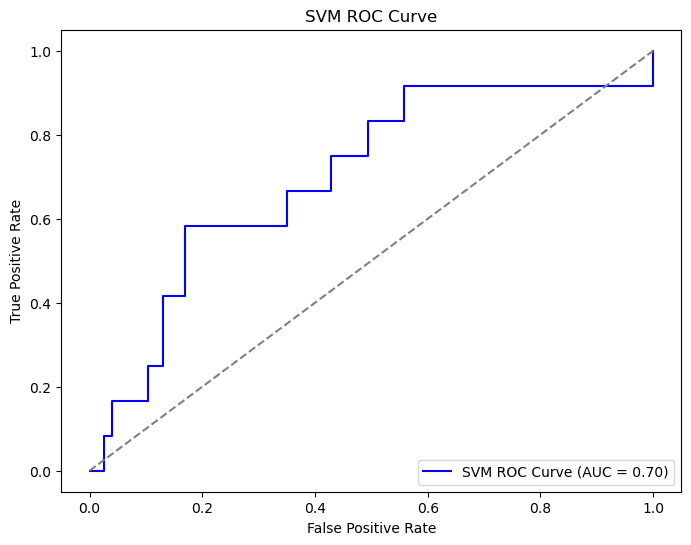

In [365]:
from sklearn.svm import SVC
# now trying a Support Vector Machine Model since Decision trees and logistic regression is not giving us a significant model 
# redefine features and target
features = ["Revenue (TTM)", "Market Cap", "P/E Ratio", "Gross Profits", "EBITDA", "Sector"]
target = "ESG_label"

X = data[features]
y = data[target]

# Preprocessing pipeline: standardize numeric, one-hot encode sector
numeric_features = ["Revenue (TTM)", "Market Cap", "P/E Ratio", "Gross Profits", "EBITDA"]
categorical_features = ["Sector"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Machine Model
svm_model = SVC(kernel='linear', probability=True, random_state=42)  # probability=True to enable predict_proba
pipeline = make_pipeline(preprocessor, svm_model)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred))

y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

# calculating the AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"SVM AUC-ROC: {roc_auc:.2f}")

# plot ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'SVM ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc='lower right')
plt.show()


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        65
           1       0.50      0.33      0.40         9

    accuracy                           0.88        74
   macro avg       0.71      0.64      0.67        74
weighted avg       0.86      0.88      0.87        74

SVM AUC-ROC: 0.64


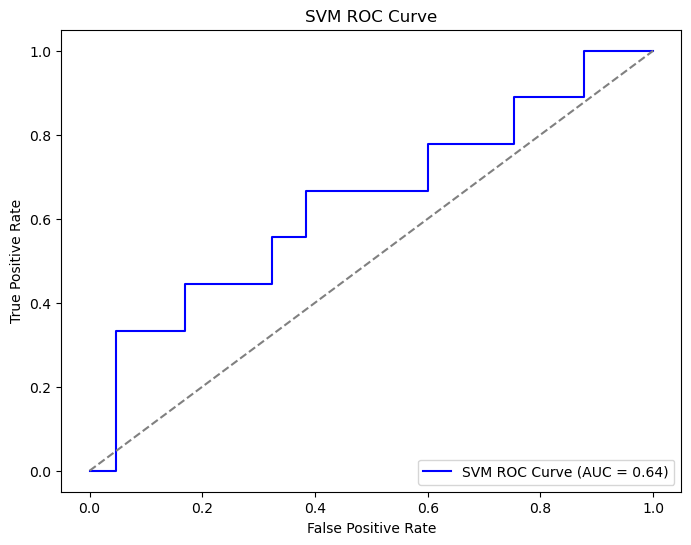

In [367]:
# trying SVM with out the outliers  
# Define features and target
features = ["Revenue (TTM)", "Market Cap", "P/E Ratio", "Gross Profits", "EBITDA", "Sector"]
target = "ESG_label"

X = outliers_trimmed[features]
y = outliers_trimmed[target]

# Preprocessing pipeline: standardize numeric, one-hot encode sector
numeric_features = ["Revenue (TTM)", "Market Cap", "P/E Ratio", "Gross Profits", "EBITDA"]
categorical_features = ["Sector"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Machine (SVM) Model
svm_model = SVC(kernel='linear', probability=True, random_state=42)  # probability=True to enable predict_proba
pipeline = make_pipeline(preprocessor, svm_model)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred))

y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

# calculating the AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"SVM AUC-ROC: {roc_auc:.2f}")

# plotting the ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'SVM ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc='lower right')
plt.show()

# After all this analysis it shows that there is not a strong enough relationship between ESG score and revenue to determine if ESG could effect revenue or vice versa. 